In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

In [2]:
image = io.imread('dog.png')

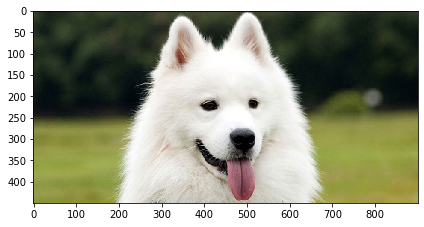

In [4]:
io.imshow(image);

In [5]:
image.shape

(450, 900, 3)

In [6]:
# preprocessing
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [7]:
print(image.shape)
print(image[:5])

(405000, 3)
[[62 74 50]
 [61 73 49]
 [60 72 48]
 [58 70 46]
 [56 68 44]]


In [8]:
# modelling
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[173, 164, 144],
       [ 40,  50,  33],
       [226, 224, 218],
       [133, 138,  61],
       [  9,  18,  17],
       [195, 189, 176],
       [ 61,  67,  45],
       [238, 237, 233],
       [107,  89,  85],
       [212, 208, 198],
       [249, 248, 247],
       [ 24,  34,  24],
       [ 91,  95,  45],
       [149, 153,  68],
       [147, 116, 116],
       [156, 162,  76]], dtype=uint8)

In [10]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(405000,)
(450, 900)


array([[ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  1,  1],
       [ 6,  6,  6, ...,  6,  1,  1],
       ...,
       [ 3,  3,  3, ..., 15, 15, 15],
       [ 3,  3,  3, ..., 15, 15, 15],
       [ 3,  3,  3, ..., 15, 15, 15]], dtype=uint8)

In [11]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('dog-compressed.png', newImage);

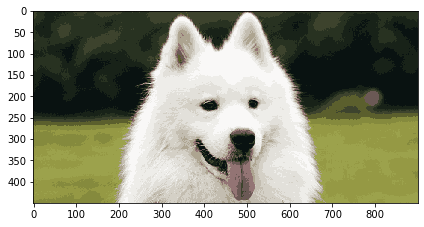

In [12]:
io.imshow(newImage);